In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [6]:
df = pd.read_csv('Train.csv')
print(df.head())
df=df.head(500)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0  2006-07-31  Stock 1   625.898686  925.086518   1550.985204      675.789905   
1  2006-08-31  Stock 1   407.387467  903.249093   1310.636561     1023.110983   
2  2006-09-29  Stock 1   464.069891  602.668832   1066.738722      709.711673   
3  2006-10-31  Stock 1   855.854937  391.375369   1247.230306      649.979564   
4  2006-11-30  Stock 1   453.954969  956.490566   1410.445534     1115.594551   

   current_liabilities  total_revenue  net_income   dividend  \
0           555.931329     548.488451  251.282553  68.184030   
1          1295.186240     513.446432  207.576940  42.232672   
2           598.719338     503.519871  133.719700  28.835722   
3           733.594339     596.006397  -76.881818   0.000000   
4          1152.274711     965.939247 -309.204301   0.000000   

   shares_outstanding       price  
0             1040831  100.000000  
1             1046649  101.924169  
2             109415

In [7]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [8]:
df_for_training = df[cols].astype(float)


In [9]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
trainX = []
trainY = []

In [11]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [12]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (486, 14, 10).
trainY shape == (486, 1).


In [13]:
df_for_training_scaled

array([[ 0.34164296,  1.41254059,  1.30291974, ...,  1.95218911,
        -0.2571073 , -0.83180949],
       [-0.52756875,  1.32971737,  0.61965326, ...,  0.95581093,
        -0.06008175, -0.61508903],
       [-0.30209279,  0.1897008 , -0.07370292, ...,  0.4414475 ,
         1.54880216, -0.47519929],
       ...,
       [-1.25935202,  0.95702492, -0.1826693 , ...,  0.71992865,
         1.56092577, -1.23305601],
       [ 0.72182897,  1.30072497,  1.49081084, ...,  0.51368591,
        -0.87287139, -1.21717694],
       [ 0.49130119, -0.38423901,  0.06310655, ...,  1.46957979,
         1.056814  , -1.15210705]])

In [14]:
trainY

array([[ 0.1078432 ],
       [-0.04924127],
       [ 0.02031598],
       [-0.05555711],
       [-0.09060047],
       [-0.01174459],
       [ 0.11062509],
       [ 0.04220278],
       [-0.10984473],
       [-0.29052066],
       [-0.23596843],
       [-0.18106189],
       [-0.1042968 ],
       [-0.06490171],
       [-0.02401681],
       [ 0.02054171],
       [ 0.20998834],
       [ 0.24537822],
       [ 0.3934287 ],
       [ 0.55818595],
       [ 0.80612091],
       [ 0.82148569],
       [ 0.76914932],
       [ 0.66540204],
       [ 0.54429419],
       [ 0.57670895],
       [ 0.60135018],
       [ 0.69155206],
       [ 0.73056692],
       [ 0.70287934],
       [ 0.79499683],
       [ 0.73291638],
       [ 0.78051838],
       [ 0.94133893],
       [ 0.998909  ],
       [ 1.00212267],
       [ 1.06039199],
       [ 1.16644954],
       [ 0.97722577],
       [ 0.95652883],
       [ 1.04578143],
       [ 1.12440995],
       [ 1.18053962],
       [ 1.27320346],
       [ 1.21273814],
       [ 1

In [15]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            19200     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
146/146 [==============================] - 6s 17ms/step - loss: 0.3128 - val_loss: 0.1198
Epoch 2/5
146/146 [==============================] - 2s 14ms/step - loss: 0.1174 - val_loss: 0.1096
Epoch 3/5
146/146 [==============================] - 2s 16ms/step - loss: 0.1049 - val_loss: 0.0910
Epoch 4/5
146/146 [==============================] - 3s 20ms/step - loss: 0.0789 - val_loss: 0.0480
Epoch 5/5
146/146 [==============================] - 2s 14ms/step - loss: 0.0813 - val_loss: 0.0923


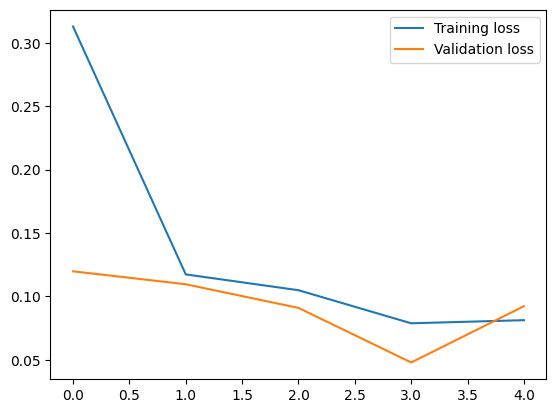

In [17]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [19]:
df2= df.head(500)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

485   2009-06-30
486   2009-07-31
487   2009-08-31
488   2009-09-30
489   2009-10-30
490   2009-11-30
491   2009-12-31
492   2010-01-29
493   2010-02-26
494   2010-03-31
495   2010-04-30
496   2010-05-31
497   2010-06-30
498   2010-07-30
499   2010-08-31
Name: Date, dtype: datetime64[ns]


In [24]:
n_past = 500
n_days_for_prediction=486  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2006-07-31 00:00:00', freq='M'), Timestamp('2006-08-31 00:00:00', freq='M'), Timestamp('2006-09-30 00:00:00', freq='M'), Timestamp('2006-10-31 00:00:00', freq='M'), Timestamp('2006-11-30 00:00:00', freq='M'), Timestamp('2006-12-31 00:00:00', freq='M'), Timestamp('2007-01-31 00:00:00', freq='M'), Timestamp('2007-02-28 00:00:00', freq='M'), Timestamp('2007-03-31 00:00:00', freq='M'), Timestamp('2007-04-30 00:00:00', freq='M'), Timestamp('2007-05-31 00:00:00', freq='M'), Timestamp('2007-06-30 00:00:00', freq='M'), Timestamp('2007-07-31 00:00:00', freq='M'), Timestamp('2007-08-31 00:00:00', freq='M'), Timestamp('2007-09-30 00:00:00', freq='M'), Timestamp('2007-10-31 00:00:00', freq='M'), Timestamp('2007-11-30 00:00:00', freq='M'), Timestamp('2007-12-31 00:00:00', freq='M'), Timestamp('2008-01-31 00:00:00', freq='M'), Timestamp('2008-02-29 00:00:00', freq='M'), Timestamp('2008-03-31 00:00:00', freq='M'), Timestamp('2008-04-30 00:00:00', freq='M'), Timestamp('2008-05-31 00:00:00'

In [25]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

16/16 [==============================] - 0s 5ms/step


In [26]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [27]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [31]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original =original.head(486)
print(original)

          Date       price
0   2006-07-31  100.000000
1   2006-08-31  101.924169
2   2006-09-29  103.166191
3   2006-10-31  104.478956
4   2006-11-30  104.160907
..         ...         ...
481 2009-02-27   99.584575
482 2009-03-31  100.508301
483 2009-04-30  101.369735
484 2009-05-29  100.494709
485 2009-06-30  101.562244

[486 rows x 2 columns]


<ipython-input-31-d10f0082f74e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [32]:
df_forecast

,Date,price
0,2006-07-31,107.773170
1,2006-08-31,107.347366
2,2006-09-30,107.833870
3,2006-10-31,107.539314
4,2006-11-30,107.360207
...,...,...
481,2046-08-31,101.290543
482,2046-09-30,100.614441
483,2046-10-31,99.630684
484,2046-11-30,99.686386


In [39]:
#RMSE calculation
original["calc"]= ((df_forecast["price"]-original["price"])/original["price"])**2

print("The RMSE is",(((original["calc"].sum())/486)**1/2)*100)
print("The Efficiency is",(100-(((original["calc"].sum())/686)**1/2)*100))




The RMSE is 0.08683758970199267
The Efficiency is 99.93847949184378
